####  학습목표
- 기울기(v)
- 절편(b)
- 회귀 평가 방법
- 피쳐, 타겟의 스케일링
- 캐글 데이터를 활용한 실습

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

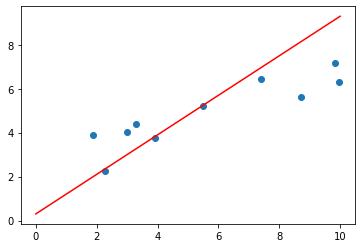

In [6]:
# f(x) = w*x + b -> cost(w,b)

w = 0.9
b = 0.3

plt.figure()
plt.scatter(X,Y)
plt.plot([0,10], [b,10*w+b],c='r')

plt.show()
plt.close()

In [43]:
# w * x.T + b
def prediction(a, b, x) :
    result = a.T*x + b  # zeros 때문에 T가 필요
    return result

In [48]:
def update_ab(a, b, x, error, lr) :
    a_delta = -(lr * (2/len(error)) * (np.dot(x.T, error))) 
    b_delta = -(lr * (2/len(error)) * np.sum(error)) 
    return a_delta, b_delta

In [45]:
# error와의 차이 계산
def gradient_descent(x, y, iters) :
    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for idx in range(iters) :
        error = y - prediction(a, b, x)
        a_delta, b_delta = update_ab(a, b, x, error, lr=learning_rate)
        a -= a_delta
        b -= b_delta
    return a,b

In [55]:
def plotting_graph(x, y, a, b) :
    y_pred = a[0,0] * x + b
    
    plt.figure()
    plt.scatter(x,y)
    plt.plot(x,y_pred, c="red")
    
    plt.show()
    plt.close()

weight :  [[3.33905384]] bias : [[1.40073661]]


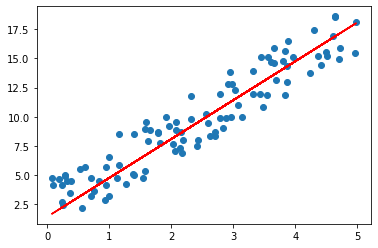

In [56]:
learning_rate = 0.005
x = 5*np.random.rand(100,1)
y = 3*x + 5*np.random.rand(100,1)

w, b = gradient_descent(x, y, iters=100)
print('weight : ', w, 'bias :', b)
plotting_graph(x,y,w,b)



In [57]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [63]:
import pandas as pd

In [71]:
# 데이터, 타겟을 프레임으로 만들고 타겟의 값을 target_names로 변경하는 최종 프레임 생성

featureDF = pd.DataFrame(data=iris.data,columns=iris.feature_names)
targetDF = pd.DataFrame(data=iris.target, columns=['species'])


In [72]:
featureDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [73]:
targetDF

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [76]:
# apply() 활용
def convert(species) :
    if species ==0 :
        return 'setosa'
    elif species == 1 :
        return 'versicolor'
    else :
        return 'virginica'

In [77]:
targetDF['species'] = targetDF['species'].apply(convert)
targetDF

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [80]:
irisDF = pd.concat([featureDF, targetDF], axis=1)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


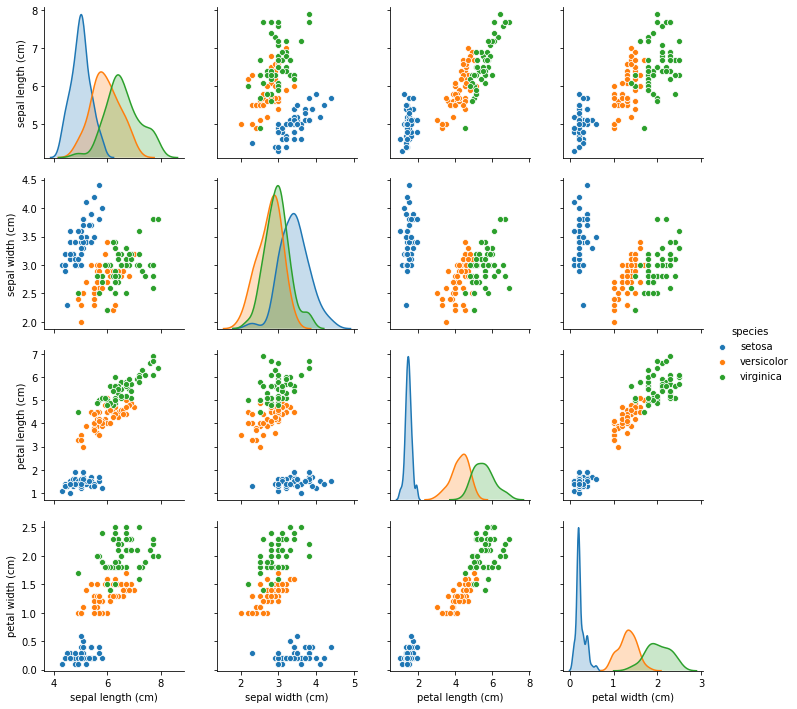

In [82]:
sns.pairplot(irisDF, hue= 'species')

In [83]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [86]:
irisDF.drop('species', axis=1, inplace = True)
targetDF = pd.DataFrame(data=iris.target, columns=['species'])

irisDF = pd.concat([irisDF, targetDF], axis=1)

In [87]:
irisDF


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [94]:
# species는 범주여서 예측이 안된다
# 그래서 feature 중 하나를 타겟으로 잡아야 햔다
# sepal length를 타겟으로 잡고 진행

X = irisDF.drop('sepal length (cm)', axis=1)
Y = irisDF['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [105]:

X_train , X_test , y_train , y_test = train_test_split(X,logY, test_size=.2 , random_state = 100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae :', mean_absolute_error(y_test, y_pred))
print('mae :', mean_squared_error(y_test, y_pred))
print('mae :', np.sqrt(mean_squared_error(y_test, y_pred)))
# 결정계수
print('R :', lr_model.score(X,logY))

mae : 0.039778668054586845
mae : 0.0022196391045392156
mae : 0.04711304601211023
R : 0.8636380066281042


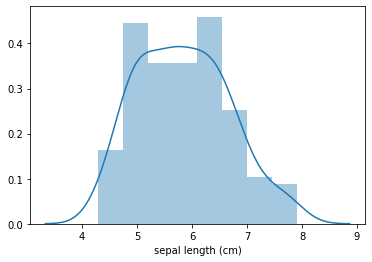

In [101]:
sns.distplot(Y)

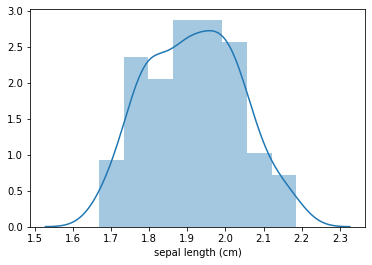

In [103]:
# 타겟은 로그변환을 통한 스케일링 작업이 필요함
logY = np.log1p(Y)
sns.distplot(logY)

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data


In [108]:
scalX = feature_scaling(method="MinMax", input_data=X)

In [110]:

X_train , X_test , y_train , y_test = train_test_split(scalX,logY, test_size=.2 , random_state = 100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print('mae :', mean_absolute_error(y_test, y_pred))
print('mae :', mean_squared_error(y_test, y_pred))
print('mae :', np.sqrt(mean_squared_error(y_test, y_pred)))
# 결정계수
print('R :', lr_model.score(scalX,logY))

mae : 0.03977866805458697
mae : 0.0022196391045392273
mae : 0.04711304601211035
R : 0.863638006628104
